In [22]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#Import data
churn = pd.read_csv("Churn_Modelling2.csv")

In [24]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
#Find missing values
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [26]:
#Drop unwanted columns
churn.drop(columns=["RowNumber","Surname"],axis=1,inplace=True)
churn.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
#Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encod1 = le.fit_transform(churn["Gender"])
encod1

array([0, 0, 0, ..., 0, 1, 0])

In [28]:
churn.drop(columns=["Gender"],axis=1,inplace=True)
churn["Gender"] = encod1
churn.head()

,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender
0,15634602,619,France,42,2,0.00,1,1,1,101348.88,1,0
1,15647311,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0
2,15619304,502,France,42,8,159660.80,3,1,0,113931.57,1,0
3,15701354,699,France,39,1,0.00,2,0,0,93826.63,0,0
4,15737888,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0


In [29]:
geo=pd.get_dummies(churn["Geography"])
geo

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [30]:
churn.drop(columns=["Geography"],axis=1,inplace=True)
churn = pd.concat([churn,geo],axis=1)
churn.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender,France,Germany,Spain
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1


In [31]:
#Splitting data into input and output

X=churn.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,13]]

y=churn.iloc[:,9]


In [32]:
#splitting data into train and test data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=100)


In [33]:
#import Random Forest Classifier from Sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [34]:
#predicting test results

prediction_test = classifier.predict(X_test)
prediction_test

array([0, 0, 0, ..., 0, 1, 0])

In [35]:
# finding confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction_test)

print("Confusion matrix \n", cm)

Confusion matrix 
 [[2570   77]
 [ 417  270]]


In [36]:
#finding accuracy

prediction_test = classifier.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8518296340731853


In [37]:
#Finding the feature importance 

feature_scores = pd.Series(classifier.feature_importances_, index=X_train.columns)

feature_scores.sort_values(ascending=False,inplace=True)

feature_scores

Age                0.223764
Balance            0.123136
NumOfProducts      0.122520
EstimatedSalary    0.118700
CreditScore        0.115740
CustomerId         0.110929
Tenure             0.077137
IsActiveMember     0.033934
Gender             0.020379
HasCrCard          0.016556
Germany            0.016303
France             0.010660
Spain              0.010242
dtype: float64

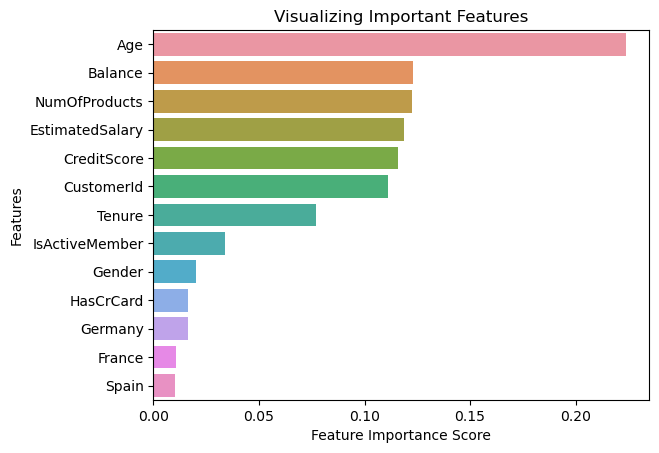

In [38]:
# visualising the feature scores using seaborn

sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

plt.title("Visualizing Important Features")

plt.show()

In [39]:
#Finding classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2647
           1       0.78      0.39      0.52       687

    accuracy                           0.85      3334
   macro avg       0.82      0.68      0.72      3334
weighted avg       0.84      0.85      0.83      3334

